In [11]:
import numpy as np
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !
import collections
import matplotlib


Radial velocit .dat file requires an extra "0" column, which is a RV offset that the code will compute automatically. This is related to the peculiar velocity of the star.
Prior for the .yaml file must come from TESS.

In [12]:
def plots_in_grid():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(2,1, height_ratios=[3.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1], sharex=ax_0)

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')
    return ax_0, ax_1

In [13]:
#dir_base = "/home/ubuntu/Desktop/lab2/WASP-44/WASP-44-b/RV_analysis/"
#dir_base = "/home/adri/Desktop/Astrolab2/Ziggy/WASP-44-b/RV_analysis/"
dir_base = ""

dir_mods = 'planet1'  # Change according to the name of the configuration file
dir_plot = "/WASP44_RV/emcee_plot/model_files/"

filename = 'RV_WASP44_polynomialtrend' # Change according to the name of the configuration file

# Comment/uncomment according to the number of datasets and their names
#datasets_list = ['RVdata_dataset1', 'RVdata_dataset2'] 
datasets_list = ['RVdata']

# Comment/uncomment according to the models listed in your configuration files
#additional_models = ['harmonics']
additional_models=['']

# Comment/uncomment and change according to the parameters of the best fit 
# from the RV analysis
planet_dict = collections.OrderedDict()
planet_dict['b'] =  {
    'P': 2.423806,          # Change the Period with the output of RV GetResults
    'Tc': 2458386.578204 ,      # Change the Time of Transit with the output of RV GetResults
    'limits_folded_x': [-0.75, 0.75],
    #'limits_folded_y': [-67.8, 67.8],
    #'limits_residuals_y': [-5.5, 5.5],
    'transit_folded': True
}

#planet_dict['c'] =  {
#    'P': 29.847138,# 0.446547,
#    'Tc': 7394.977940,
#    'limits_folded_x': [-0.25, 1.25],
#    'transit_folded': False}

#planet_dict['d'] =  {
#    'P': 56.815109,
#    'Tc': 7738.582713,
#    'limits_folded_x': [-0.25, 1.25],
#    'transit_folded': False
#}



full_dict = {
    'reference_planet': 'b',
    #'limits_full_x': [-0.75, 0.75],
    'limits_full_x': [-0.25, 1.25],
    'limits_bjd': [2458336.573427, 2458435.5],          # Change the interval of the plot
    #'limits_full_y': [-69.0, 69.0],
    #'limits_residuals_y': [-5.5, 5.5],
}

Planet  b , RV curve folded around the transit time
Folded plot for planet  b  saved to: RV_WASP44_polynomialtrend_b_folded.png


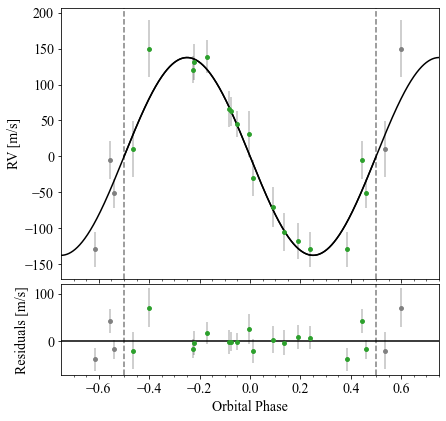

In [14]:
# Folder RV plot for each of the planet

font_label = 14
dot_size = 15

figsize = ((7,6))

csfont = {'fontname':'Times New Roman'}
matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rcParams.update({'font.size': font_label})


n_figure = 0
for key_name, key_val in planet_dict.items():
    #RV_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_full.dat', skip_header=1)


    #sel = (RV_mod_temp[:,9] < 7.8)
    #RV_mod = RV_mod_temp[sel,:]
    
    #RV_mod = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'.dat', skip_header=1)
    #RV_mod_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'_full.dat', skip_header=1)
    RV_kep = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_kep.dat', skip_header=1)

    if key_val.get('transit_folded',True):
        RV_pha = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_Tcf.dat', skip_header=1)
    else:
        RV_pha = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_pha.dat', skip_header=1)


    
    fig = plt.figure(n_figure, figsize=figsize)

    ax_0, ax_1 = plots_in_grid()
    
    if key_val.get('transit_folded',False):
        print('Planet ',key_name,', RV curve folded around the transit time')
        ax_0.axvline(-1.0, color='k', alpha=0.2, ls='--')
        ax_0.axvline( 1.0, color='k', alpha=0.2, ls='--')

        ax_1.axvline(-1.0, color='k', alpha=0.2, ls='--')
        ax_1.axvline( 1.0, color='k', alpha=0.2, ls='--')
        
    else:
        print('Planet ',key_name,', RV curve folded around the reference time')
        ax_0.axvline(-0.5, color='k', alpha=0.2, ls='--')
        ax_0.axvline( 0.5, color='k', alpha=0.2, ls='--')

        ax_1.axvline(-0.5, color='k', alpha=0.2, ls='--')
        ax_1.axvline( 0.5, color='k', alpha=0.2, ls='--')
    
    
    
    # Plot of the model
    ax_0.plot(RV_pha[:,0]-1,RV_pha[:,1], color='k', linestyle='-', zorder=2, label='RV model')
    ax_0.plot(RV_pha[:,0]+1,RV_pha[:,1], color='k', linestyle='-', zorder=2)

    
    for n_dataset, dataset in enumerate(datasets_list):
        default_color = 'C' + repr(2-n_dataset)

        RV_mod_temp = np.genfromtxt(dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_'+key_name+'.dat', skip_header=1)
        sel = (RV_mod_temp[:,9] < 400)
        RV_mod = RV_mod_temp[sel,:]
    
        if key_val.get('transit_folded',False):
            rv_phase = RV_mod[:,1] / planet_dict[key_name]['P']
        else:
            rv_phase = RV_mod[:,2]
        
        ax_0.errorbar(rv_phase, RV_mod[:,8], yerr=RV_mod[:,9], color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase, RV_mod[:,8], c=default_color, s=dot_size, zorder=5, alpha=1.0, label=dataset)

        # Adding points at phase-1
        ax_0.errorbar(rv_phase-1, RV_mod[:,8], yerr=RV_mod[:,9], color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase-1, RV_mod[:,8], c='gray', s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase+1
        ax_0.errorbar(rv_phase+1, RV_mod[:,8], yerr=RV_mod[:,9], color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase+1, RV_mod[:,8], c='gray', s=dot_size, zorder=10, alpha=1.0)


        # plot of the residuals
        ax_1.errorbar(rv_phase, RV_mod[:,10], yerr=RV_mod[:,11], color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase, RV_mod[:,10], c=default_color, s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase-1
        ax_1.errorbar(rv_phase-1, RV_mod[:,10], yerr=RV_mod[:,11], color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase-1, RV_mod[:,10], c='gray', s=dot_size, zorder=10, alpha=1.0)

        # Adding points at phase+1
        ax_1.errorbar(rv_phase+1, RV_mod[:,10], yerr=RV_mod[:,11], color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase+1, RV_mod[:,10], c='gray', s=dot_size, zorder=10, alpha=1.0)

    
    
    
    ax_1.axhline(0.000, c='k', zorder=3)
        
    if key_val.get('limits_folded_x', False):
        ax_0.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
        ax_1.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
    if key_val.get('limits_folded_y', False):
        ax_0.set_ylim(key_val['limits_folded_y'][0], key_val['limits_folded_y'][1])
    if key_val.get('limits_residuals_y', False):
        ax_1.set_ylim(key_val['limits_residuals_y'][0], key_val['limits_residuals_y'][1])

    ax_0.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
    ax_0.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')

    ax_1.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
    ax_1.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
  
    #ax_0.axes.get_xaxis().set_ticks([])
    
    ax_0.set_ylabel('RV [m/s]')
    ax_1.set_xlabel('Orbital Phase')
    ax_1.set_ylabel('Residuals [m/s]')
    
    #ax_0.legend()
    plot_filename = filename+'_'+key_name+'_folded.png'
    print('Folded plot for planet ',key_name,' saved to:', plot_filename )
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    n_figure += 1

Full keplerian plot for planet saved to: RV_WASP44_polynomialtrend_full_RVs.png


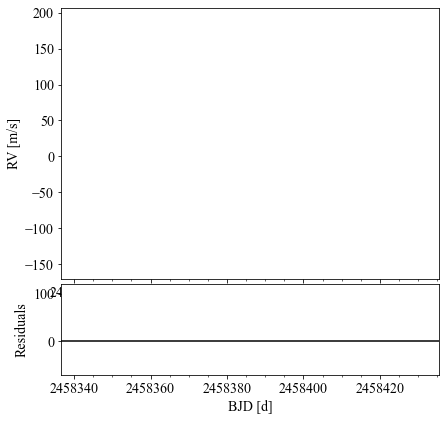

In [16]:
ref_planet = full_dict['reference_planet']

fig = plt.figure(n_figure, figsize=figsize)
ax_0, ax_1 = plots_in_grid()
default_color = 'C' + repr(n_figure)

RV_mod = 0
for key_name, key_val in planet_dict.items():
    RV_kep = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_kep.dat', skip_header=1)
    try:
        RV_mod += RV_kep[:,1]
    except:
        RV_mod = RV_kep[:,1]
    #RV_pha = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+ref_planet+'_pha.dat', skip_header=1)


for key_n, key_name in enumerate(additional_models):
    if key_name == '': continue

    RV_add = np.genfromtxt(dir_base + dir_mods + dir_plot + datasets_list[0] + '_' + key_name + '_full.dat', skip_header=1)
    RV_mod += RV_add[:,3]

    
ax_0.plot(RV_kep[:,0],RV_mod, color='k', linestyle='-', zorder=2, alpha=0.25, lw=0.5)


for n_dataset, dataset in enumerate(datasets_list):
    default_color = 'C' + repr(2-n_dataset)

    #RV_mod = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+ref_planet+'.dat', skip_header=1)
    RV_mod_temp = np.genfromtxt(dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_'+full_dict['reference_planet']+'.dat', skip_header=1)
    sel = (RV_mod_temp[:,9] < 400)
    RV_mod = RV_mod_temp[sel,:]
    
    ax_0.errorbar(RV_mod[:,0], RV_mod[:,3]-RV_mod[:,5], yerr=RV_mod[:,4], color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(RV_mod[:,0], RV_mod[:,3]-RV_mod[:,5], c=default_color, s=5, zorder=10, alpha=0.5)

    # plot of the residuals
    ax_1.errorbar(RV_mod[:,0], RV_mod[:,10], yerr=RV_mod[:,11], color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(RV_mod[:,0], RV_mod[:,10], c=default_color, s=5, zorder=10, alpha=0.5)

ax_1.axhline(0.000, c='k', zorder=3)

if full_dict.get('limits_folded_x', False):
    ax_0.set_xlim(full_dict['limits_folded_x'][0], full_dict['limits_folded_x'][1])
    ax_1.set_xlim(full_dict['limits_folded_x'][0], full_dict['limits_folded_x'][1])
if full_dict.get('limits_folded_y', False):
    ax_0.set_ylim(full_dict['limits_folded_y'][0], full_dict['limits_folded_y'][1])
if full_dict.get('limits_residuals_y', False):
    ax_1.set_ylim(full_dict['limits_residuals_y'][0], full_dict['limits_residuals_y'][1])

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('BJD [d]')
ax_1.set_ylabel('Residuals')
plot_filename = filename+'_'+'full_RVs.png'

ax_0.set_xlim(full_dict['limits_bjd'][0], full_dict['limits_bjd'][1])
ax_1.set_xlim(full_dict['limits_bjd'][0], full_dict['limits_bjd'][1])


#RV_kep = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_e_kep.dat', skip_header=1)
#ax_0.plot(RV_kep[:,0], RV_kep[:,1], c='C3')

#RV_kep = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_f_kep.dat', skip_header=1)
#ax_0.plot(RV_kep[:,0], RV_kep[:,1], c='C4')

print('Full keplerian plot for planet saved to:', plot_filename )
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
